In [2]:
import pandas as pd
import numpy as np

In [3]:
adver_data = pd.read_csv('advertising.csv')

In [4]:
adver_data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
adver_data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
x = np.array(adver_data[['TV', 'Radio', 'Newspaper']])
y = np.array(adver_data['Sales'])

In [7]:
mean = x.mean(axis=0)
std = x.std(axis=0)

In [8]:
x = (x-mean)/std
x

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [9]:
x = np.insert(x, 0, 1, axis=1)
x

array([[ 1.00000000e+00,  9.69852266e-01,  9.81522472e-01,
         1.77894547e+00],
       [ 1.00000000e+00, -1.19737623e+00,  1.08280781e+00,
         6.69578760e-01],
       [ 1.00000000e+00, -1.51615499e+00,  1.52846331e+00,
         1.78354865e+00],
       [ 1.00000000e+00,  5.20496822e-02,  1.21785493e+00,
         1.28640506e+00],
       [ 1.00000000e+00,  3.94182198e-01, -8.41613655e-01,
         1.28180188e+00],
       [ 1.00000000e+00, -1.61540845e+00,  1.73103399e+00,
         2.04592999e+00],
       [ 1.00000000e+00, -1.04557682e+00,  6.43904671e-01,
        -3.24708413e-01],
       [ 1.00000000e+00, -3.13436589e-01, -2.47406325e-01,
        -8.72486994e-01],
       [ 1.00000000e+00, -1.61657614e+00, -1.42906863e+00,
        -1.36042422e+00],
       [ 1.00000000e+00,  6.16042873e-01, -1.39530685e+00,
        -4.30581584e-01],
       [ 1.00000000e+00, -9.45155670e-01, -1.17923146e+00,
        -2.92486143e-01],
       [ 1.00000000e+00,  7.90028350e-01,  4.96973404e-02,
      

In [10]:
def mserror(y, y_pred):
    return sum((y - y_pred)**2)/len(y)

In [11]:
answer1 = mserror(y, y.mean())
print(answer1)

27.085743750000002


In [12]:
def normal_equation(x, y):
    return np.dot(np.linalg.pinv(x), y)

In [13]:
norm_eq_weights = normal_equation(x, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


In [14]:
answer2 = np.dot(np.mean(x, axis=0), norm_eq_weights)
print(answer2)

14.022499999999999


In [15]:
def linear_prediction(x, w):
    return np.dot(x, w)

In [16]:
answer3 = mserror(y, linear_prediction(x, norm_eq_weights))
print(answer3)

2.784126314510936


In [17]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad = [(linear_prediction(X[train_ind], w) - y[train_ind]) * 2 * X[train_ind][i] for i in range(len(X[0]))]
    return  w - eta * np.array(grad)

In [18]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        old_w = w
        w = stochastic_gradient_step(X, y, w, random_ind, eta=eta)

        weight_dist = np.linalg.norm(w - old_w)
        errors.append(mserror(y, np.dot(X, w)))
        iter_num += 1
        
    return w, errors

In [54]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(x, y,
    np.ones((x.shape[1])), eta=1e-2, max_iter=10**4, verbose = True)

CPU times: user 603 ms, sys: 7.41 ms, total: 610 ms
Wall time: 622 ms


In [55]:
stoch_grad_desc_weights

array([14.18840901,  3.63310309,  2.84644722, -0.0299736 ])

In [56]:
stoch_errors_by_iter[:50]

[175.57082047241275,
 170.01075155032552,
 160.47224624525455,
 152.11325618368457,
 149.51634129181994,
 145.21672232189005,
 137.92464722831693,
 131.53441992435793,
 127.06623738675225,
 125.03933241567813,
 118.72694188970783,
 113.67913145340765,
 110.2933853131218,
 105.0037270980833,
 100.66120018375027,
 98.63781531719924,
 97.88271117537471,
 95.10546068599821,
 88.17111684240456,
 86.39349377487174,
 84.09834520257094,
 81.90758876702824,
 79.58246415904047,
 78.39734936228966,
 75.81680184207113,
 71.40418135132,
 68.6903916147733,
 66.23523566385693,
 63.635413557232205,
 61.7695610570238,
 61.14668979468869,
 59.790945211205546,
 55.10095673083375,
 52.13431547648266,
 49.136136550920874,
 47.1636105810658,
 46.279667249176875,
 45.539637299451016,
 44.230362153777584,
 43.646689554708935,
 43.02280919048174,
 42.416537002759576,
 39.17168337019125,
 37.133708867106186,
 37.63614997258261,
 37.2354386689361,
 36.87759101048816,
 35.69295051184212,
 34.90358319288953,
 34.3

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

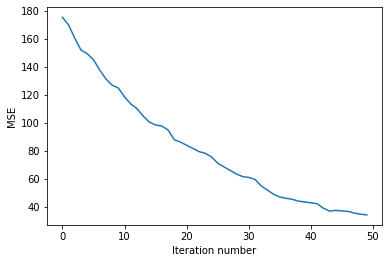

In [57]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

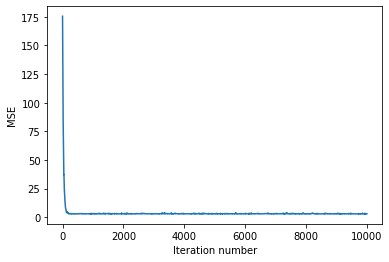

In [62]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

In [59]:
stoch_grad_desc_weights

array([14.18840901,  3.63310309,  2.84644722, -0.0299736 ])

In [60]:
stoch_errors_by_iter[-1]

2.89479600457249

In [61]:
answer4 = mserror(y, linear_prediction(x, stoch_grad_desc_weights))
print(answer4)

2.89479600457249
